# <span style = "color: red"> K-Means Clustering </span>

# <span style= "color: red"> 1.0 Importing required libraries </span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.
from sklearn.datasets import make_blobs # The make_blobs() function can be used to generate blobs of points with a Gaussian distribution. You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.

import warnings
warnings.filterwarnings("ignore")


# <span style="color:red">2.0 Importing 2 feature dataset for clustering</span>

In [2]:
data = pd.read_csv("Desktop/data.csv")
data.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


In [3]:
### dropping label color feature
data1= data.drop("color" , axis = 1)
data1.head()

,x,y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682


In [4]:
data1.shape

(336, 2)

Text(0, 0.5, 'Y')

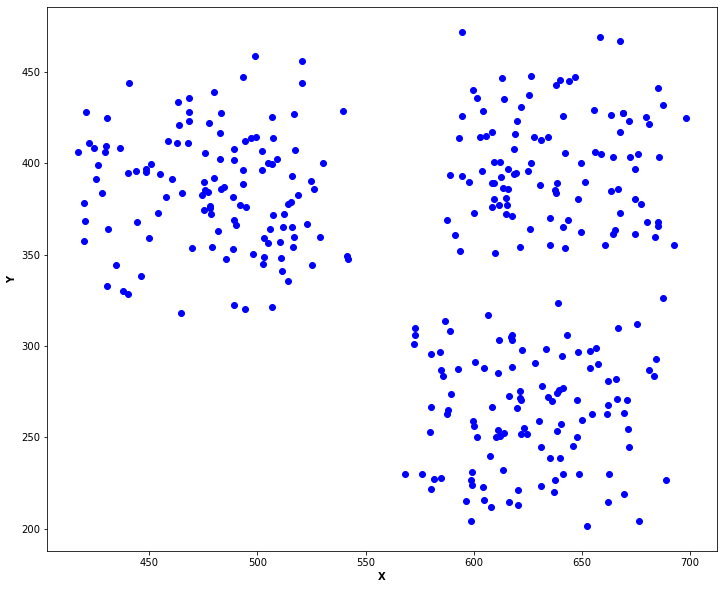

In [7]:
plt.figure(figsize=(12,10))
plt.scatter(data=data1,color="b", x="x" ,y="y")
plt.xlabel("X" , fontsize=10 , fontweight="bold" )
plt.ylabel("Y", fontsize=10,fontweight="bold" )

### Calculating WCSS for K=1 to K=11 clusters
The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. 
It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [8]:
wcss=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(data1)
    wcss.append(round(km.inertia_,2))
print(f"wcss list:{wcss}")
    

wcss list:[1634662.14, 637691.33, 544918.2, 465070.66, 397126.81, 342560.07, 290577.44, 247278.07, 223401.19]


Text(0.5, 1.0, 'WCSS value vs K value')

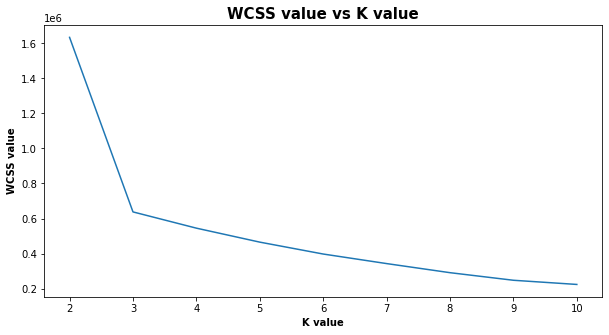

In [18]:
### Plotting WCSS with K
plt.figure(figsize=(10,5))
plt.plot(range(2,11),wcss)
plt.xlabel("K value" , fontsize=10,fontweight="bold")
plt.ylabel("WCSS value" , fontsize=10 , fontweight="bold")
plt.title("WCSS value vs K value", fontsize=15, fontweight="bold")


In [19]:
### Getting labels of clustered records

X=data1.iloc[:,:].values
km=KMeans(n_clusters=3)
Y_means=km.fit_predict(X)
Y_means


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [21]:
### Silhoutte score
score= round(silhouette_score(X, km.labels_, metric='euclidean'),3)
score

0.611

Text(0, 0.5, 'Y')

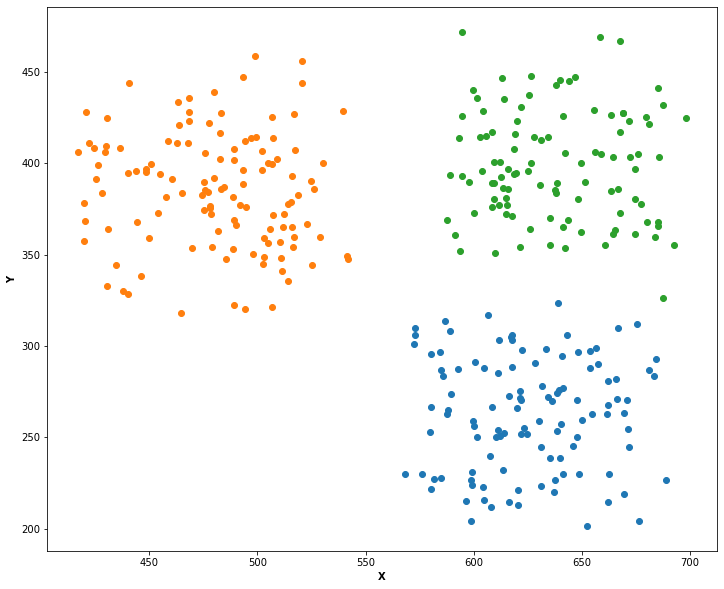

In [23]:
### Plotting different clusters after K-Means Clustering
plt.figure(figsize=(12,10))
plt.scatter(X[Y_means==0,0],X[Y_means==0,1])
plt.scatter(X[Y_means==1,0],X[Y_means==1,1])
plt.scatter(X[Y_means==2,0],X[Y_means==2,1])
plt.xlabel("X" , fontsize=10,fontweight="bold")
plt.ylabel("Y" , fontsize=10,fontweight="bold")


# <span style="color:red"> 3.0 Creating 3-D dataset for clustering </span>

In [30]:
### defining four centroid
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]

### standard deviation for cluster 
cluster_std=[1,1,1,1]

### Creating 300 samples

X,y=make_blobs(n_samples=300,cluster_std=cluster_std,centers= centroids,n_features=3,random_state=1 )


In [31]:
### Visualizing dataset

fig=px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show();

In [34]:
### Calculating WCSS for K=1 to K=21 clusters
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(round(km.inertia_,2))
print(f"wcss values:{wcss}")

wcss values:[16520.33, 6135.27, 3215.25, 879.2, 809.91, 748.2, 699.3, 642.64, 585.82, 554.62, 519.07, 496.69, 474.1, 443.73, 419.01, 404.77, 387.49, 371.21, 356.69, 348.62]


Text(0.5, 1.0, 'WCSS Vs K values')

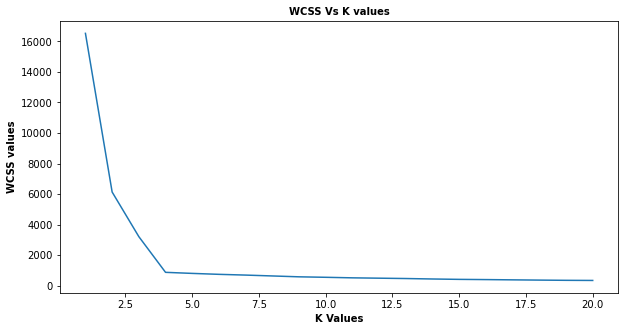

In [35]:
### Plotting WCSS with K
plt.figure(figsize=(10,5))
plt.plot(range(1,21),wcss)
plt.xlabel("K Values" , fontsize=10,fontweight="bold")
plt.ylabel("WCSS values" , fontsize=10,fontweight="bold")
plt.title("WCSS Vs K values" ,fontsize=10,fontweight="bold")

In [36]:
X=data1.iloc[:,:].values
km=KMeans(n_clusters=4)
Y_means=km.fit_predict(X)
Y_means


array([3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
### Silhoutte score
score=round(silhouette_score(X,km.labels_,metric="euclidean"),3)
score

0.504